In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from glob import glob

### **Load the Image Data**

In [ ]:
images=glob("drive/MyDrive/data/Flickr_Data/Images/*.jpg")

In [ ]:
len(images)

0

In [ ]:
images[:5]

[]

### **load the Caption Data**

In [ ]:
captions=open("drive/MyDrive/data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt","rb").read().decode("utf-8").split("\n")

FileNotFoundError: ignored

In [ ]:
len(captions)

40461

In [ ]:
captions[:11]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

### **Working on Resnet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
incept_model=ResNet50(include_top=True)
incept_model.layers[-2]
last_layer=incept_model.layers[-2].output
my_model=Model(inputs=incept_model.input,outputs=last_layer)
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
images_features={}

In [ ]:
count=0
for i in images:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    img=img.reshape(1,224,224,3)

    pred=my_model.predict(img).reshape(2048,)
    img_name=i.split("/")[-1]
    images_features[img_name]=pred
    count=count+1

    if count>149:
        break
    elif count%100==0:
        print(count)

KeyboardInterrupt: ignored

In [ ]:
np.save("images_feature1500.npy",images_features)

In [ ]:
images_features={}

In [ ]:
images_features=np.load("/content/drive/MyDrive/data/Flickr_Data/iamges_feature1500.npy",allow_pickle=True)

In [ ]:
images_features=images_features.item()

In [ ]:
len(images_features)

1500

In [ ]:
images_features

{'3724738804_f00748a137.jpg': array([0.09703724, 0.46245742, 0.61937404, ..., 0.06756678, 0.03336281,
        0.03249678], dtype=float32),
 '3767841911_6678052eb6.jpg': array([0.982455  , 2.4510713 , 0.3211898 , ..., 0.33291602, 1.5827398 ,
        0.01405634], dtype=float32),
 '397547349_1fd14b95af.jpg': array([0.11644847, 1.4776348 , 0.06862482, ..., 1.3531926 , 0.74944484,
        0.47959268], dtype=float32),
 '374103842_17873ce505.jpg': array([0.4451739 , 2.768449  , 0.17592165, ..., 0.96148473, 0.        ,
        0.7150343 ], dtype=float32),
 '3725353555_75c346d7ec.jpg': array([0.07809318, 0.31293318, 0.        , ..., 0.21452726, 0.00781308,
        0.28808948], dtype=float32),
 '3765374230_cb1bbee0cb.jpg': array([0.9149203 , 1.7997278 , 0.41513965, ..., 0.        , 0.00418705,
        0.11057103], dtype=float32),
 '379006645_b9a2886b51.jpg': array([1.2150728 , 0.42249936, 0.40000868, ..., 0.05146196, 0.05854448,
        0.18797956], dtype=float32),
 '3724718895_bd03f4a4dc.jpg': 

In [ ]:
captions_dict={}
for i in captions:
  try:
    img_name=i.split("\t")[0][:-2]
    caption=i.split("\t")[1]
    if img_name in images_features:
      if img_name not in captions_dict:
        captions_dict[img_name]=[caption]
      else:
        captions_dict[img_name].append(caption)
  except:
    pass

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': ['A black horse and its rider are clearing a 3 rung high jump in a competition .',
  'A horse and rider leap over a striped hurdle .',
  'A person is riding a horse as it jumps over an obstacle .',
  'A person jumping a horse over a fence .',
  'A rider and horse jumping a fence outdoors .'],
 '3516960094_87fb4889de.jpg': ['a female athlete is jumping into the sand .',
  'A girl is performing the long jump with arms in the air .',
  'A woman competing in a long jump competition .',
  'The woman is jumping a long distance while people watch .',
  'Woman competing in the long jump , photographed in midair .'],
 '3517023411_a8fbd15230.jpg': ['A biker is racing to keep up with the runners',
  'a biker rides down the street .',
  'A man on a red bicycle rides past several pedestrians .',
  'A man with something orange on his helmet riding a bike in a busy setting .',
  'Man rides on bicycle as other people walk .'],
 '3517040752_debec03376.jpg': ['A first basem

### **Check Image with Caption**

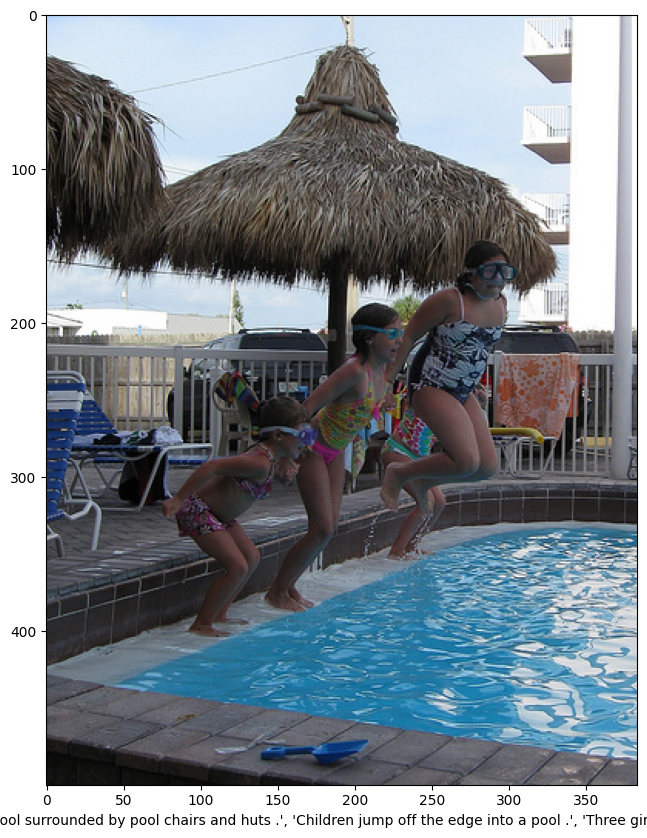

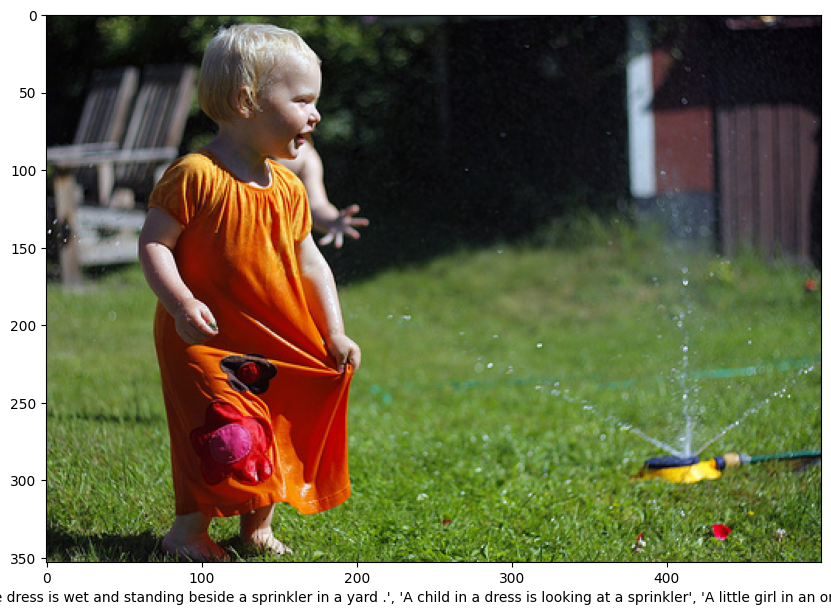

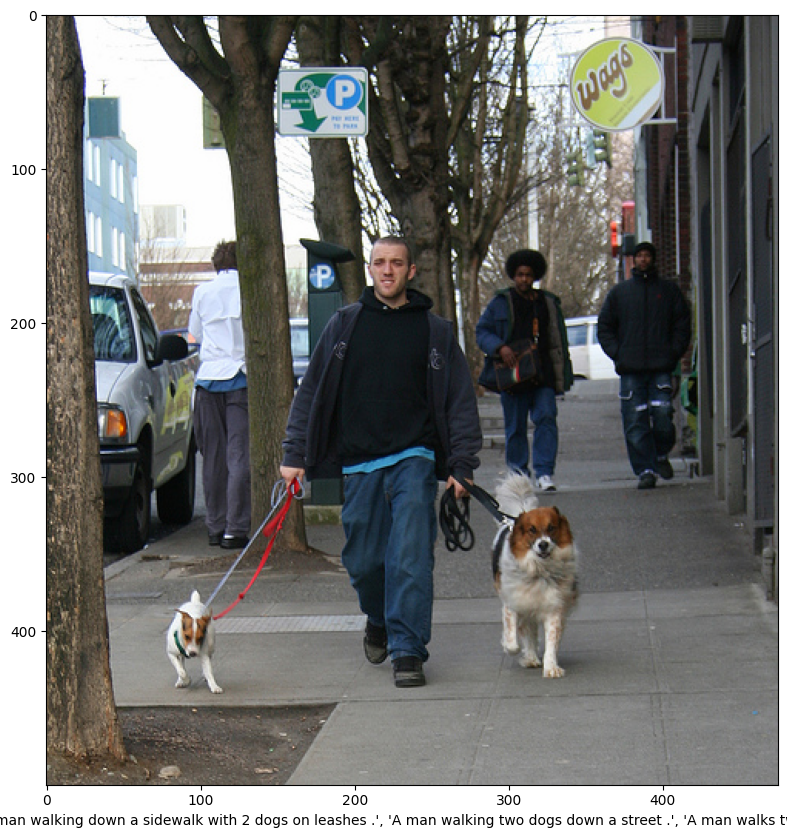

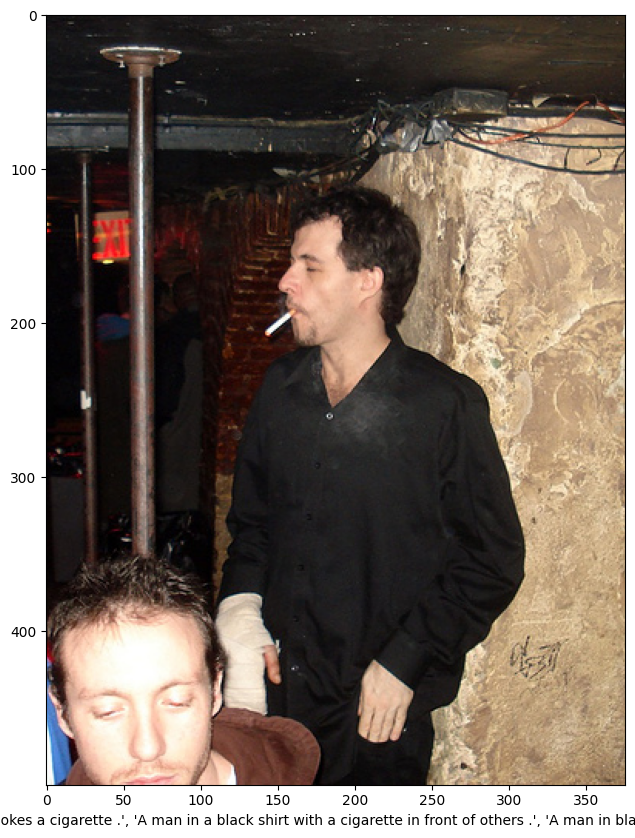

In [ ]:
for i in range(4):
  plt.figure(figsize=(10, 10))
  img_name=images[i]
  img=cv2.imread(img_name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.xlabel(captions_dict[img_name.split('/')[-1]])
  plt.imshow(img)

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': ['startofseq a black horse and its rider are clearing a 3 rung high jump in a competition . endofseq',
  'startofseq a horse and rider leap over a striped hurdle . endofseq',
  'startofseq a person is riding a horse as it jumps over an obstacle . endofseq',
  'startofseq a person jumping a horse over a fence . endofseq',
  'startofseq a rider and horse jumping a fence outdoors . endofseq'],
 '3516960094_87fb4889de.jpg': ['startofseq a female athlete is jumping into the sand . endofseq',
  'startofseq a girl is performing the long jump with arms in the air . endofseq',
  'startofseq a woman competing in a long jump competition . endofseq',
  'startofseq the woman is jumping a long distance while people watch . endofseq',
  'startofseq woman competing in the long jump , photographed in midair . endofseq'],
 '3517023411_a8fbd15230.jpg': ['startofseq a biker is racing to keep up with the runners endofseq',
  'startofseq a biker rides down the street . endofseq

### **Create Vocbulary**

In [ ]:
count_words = {}
for k,v in captions_dict.items():
    for vv in v:
        for word in vv.split():
            if word=="a":
                pass
            if word not in count_words:
                count_words[word] = 0
            else:
                count_words[word] += 1

In [ ]:
count_words

{'startofseq': 7499,
 'a': 11769,
 'black': 725,
 'horse': 57,
 'and': 1613,
 'its': 189,
 'rider': 33,
 'are': 665,
 'clearing': 4,
 '3': 2,
 'rung': 0,
 'high': 37,
 'jump': 71,
 'in': 3585,
 'competition': 4,
 '.': 6792,
 'endofseq': 7499,
 'leap': 4,
 'over': 243,
 'striped': 32,
 'hurdle': 21,
 'person': 294,
 'is': 1678,
 'riding': 156,
 'as': 182,
 'it': 89,
 'jumps': 179,
 'an': 462,
 'obstacle': 18,
 'jumping': 270,
 'fence': 42,
 'outdoors': 27,
 'female': 20,
 'athlete': 2,
 'into': 214,
 'the': 3408,
 'sand': 85,
 'girl': 691,
 'performing': 32,
 'long': 57,
 'with': 1504,
 'arms': 51,
 'air': 184,
 'woman': 638,
 'competing': 3,
 'distance': 22,
 'while': 341,
 'people': 518,
 'watch': 42,
 ',': 670,
 'photographed': 2,
 'midair': 39,
 'biker': 31,
 'racing': 25,
 'to': 636,
 'keep': 1,
 'up': 236,
 'runners': 5,
 'rides': 82,
 'down': 324,
 'street': 202,
 'man': 1343,
 'on': 2038,
 'red': 531,
 'bicycle': 69,
 'past': 36,
 'several': 56,
 'pedestrians': 2,
 'something': 

In [ ]:
len(count_words)

3962

In [ ]:
count_words["a"]

11769

In [ ]:
count = 1
new_dict = {}
for k,v in count_words.items():
      new_dict[k] = count
      count += 1

In [ ]:
new_dict

{'startofseq': 1,
 'a': 2,
 'black': 3,
 'horse': 4,
 'and': 5,
 'its': 6,
 'rider': 7,
 'are': 8,
 'clearing': 9,
 '3': 10,
 'rung': 11,
 'high': 12,
 'jump': 13,
 'in': 14,
 'competition': 15,
 '.': 16,
 'endofseq': 17,
 'leap': 18,
 'over': 19,
 'striped': 20,
 'hurdle': 21,
 'person': 22,
 'is': 23,
 'riding': 24,
 'as': 25,
 'it': 26,
 'jumps': 27,
 'an': 28,
 'obstacle': 29,
 'jumping': 30,
 'fence': 31,
 'outdoors': 32,
 'female': 33,
 'athlete': 34,
 'into': 35,
 'the': 36,
 'sand': 37,
 'girl': 38,
 'performing': 39,
 'long': 40,
 'with': 41,
 'arms': 42,
 'air': 43,
 'woman': 44,
 'competing': 45,
 'distance': 46,
 'while': 47,
 'people': 48,
 'watch': 49,
 ',': 50,
 'photographed': 51,
 'midair': 52,
 'biker': 53,
 'racing': 54,
 'to': 55,
 'keep': 56,
 'up': 57,
 'runners': 58,
 'rides': 59,
 'down': 60,
 'street': 61,
 'man': 62,
 'on': 63,
 'red': 64,
 'bicycle': 65,
 'past': 66,
 'several': 67,
 'pedestrians': 68,
 'something': 69,
 'orange': 70,
 'his': 71,
 'helmet': 7

In [ ]:
len(new_dict)

3962

In [ ]:
new_dict['<OUT>'] = len(new_dict)+1

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
for k, v in captions_dict.items():
    for vv in v:
        encoded = []
        for word in vv.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])
        captions_dict[k][v.index(vv)] = encoded

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   13,
   14,
   2,
   15,
   16,
   17],
  [1, 2, 4, 5, 7, 18, 19, 2, 20, 21, 16, 17],
  [1, 2, 22, 23, 24, 2, 4, 25, 26, 27, 19, 28, 29, 16, 17],
  [1, 2, 22, 30, 2, 4, 19, 2, 31, 16, 17],
  [1, 2, 7, 5, 4, 30, 2, 31, 32, 16, 17]],
 '3516960094_87fb4889de.jpg': [[1, 2, 33, 34, 23, 30, 35, 36, 37, 16, 17],
  [1, 2, 38, 23, 39, 36, 40, 13, 41, 42, 14, 36, 43, 16, 17],
  [1, 2, 44, 45, 14, 2, 40, 13, 15, 16, 17],
  [1, 36, 44, 23, 30, 2, 40, 46, 47, 48, 49, 16, 17],
  [1, 44, 45, 14, 36, 40, 13, 50, 51, 14, 52, 16, 17]],
 '3517023411_a8fbd15230.jpg': [[1, 2, 53, 23, 54, 55, 56, 57, 41, 36, 58, 17],
  [1, 2, 53, 59, 60, 36, 61, 16, 17],
  [1, 2, 62, 63, 2, 64, 65, 59, 66, 67, 68, 16, 17],
  [1, 2, 62, 41, 69, 70, 63, 71, 72, 24, 2, 73, 14, 2, 74, 75, 16, 17],
  [1, 62, 59, 63, 65, 25, 76, 48, 77, 16, 17]],
 '3517040752_debec03376.jpg': [[1,
   2,
   78,
   79,
   80,
   2,
   81,

In [ ]:
MAX_LEN=0
for k,v in captions_dict.items():
  for vv in v:
    if len(vv)>MAX_LEN:
      MAX_LEN=len(vv)

In [ ]:
MAX_LEN

34

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):

    X = []
    y_in = []
    y_out = []

    for k, v in caption.items():
        for vv in v:
            for i in range(1, len(vv)):
                X.append(photo[k])

                in_seq= [vv[:i]]
                out_seq = vv[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(96564, 2048)

In [ ]:
y_in = np.array(y_in, dtype='float64')
y_in.shape

(96564, 34)

In [ ]:
y_out=np.array(y_out,dtype="float64")

In [ ]:
y_out.shape

(96564, 3963)

In [ ]:
y_in[10]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,  2., 10.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
len(y_out[10])

3963

### **Create Models**

In [ ]:
import tensorflow

In [ ]:
vocab_size=len(new_dict)

In [ ]:
image_model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(128,input_shape=(2048,),activation="relu"),
    tensorflow.keras.layers.RepeatVector(MAX_LEN)
])
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 34, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
language_model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Embedding(input_dim=vocab_size,output_dim=128,input_length=MAX_LEN),
    tensorflow.keras.layers.LSTM(256,return_sequences=True),
    tensorflow.keras.layers.TimeDistributed(tensorflow.keras.layers.Dense(128))
])

language_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           507264    
                                                                 
 lstm (LSTM)                 (None, 34, 256)           394240    
                                                                 
 time_distributed (TimeDistr  (None, 34, 128)          32896     
 ibuted)                                                         
                                                                 
Total params: 934,400
Trainable params: 934,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conca=tensorflow.keras.layers.Concatenate()([image_model.output,language_model.output])

In [ ]:
x=tensorflow.keras.layers.LSTM(128,return_sequences=True)(conca)
x=tensorflow.keras.layers.LSTM(512,return_sequences=False)(x)
x=tensorflow.keras.layers.Dense(vocab_size)(x)
out=tensorflow.keras.layers.Activation("softmax")(x)
model=tensorflow.keras.models.Model(inputs=[image_model.input,language_model.input], outputs=out)
model.compile(loss="categorical_crossentropy", optimizer="RMSprop",metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_input (InputLayer)   [(None, 34)]         0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 128)      507264      ['embedding_input[0][0]']        
                                                                                                  
 dense (Dense)                  (None, 128)          262272      ['dense_input[0][0]']            
                                                                                            

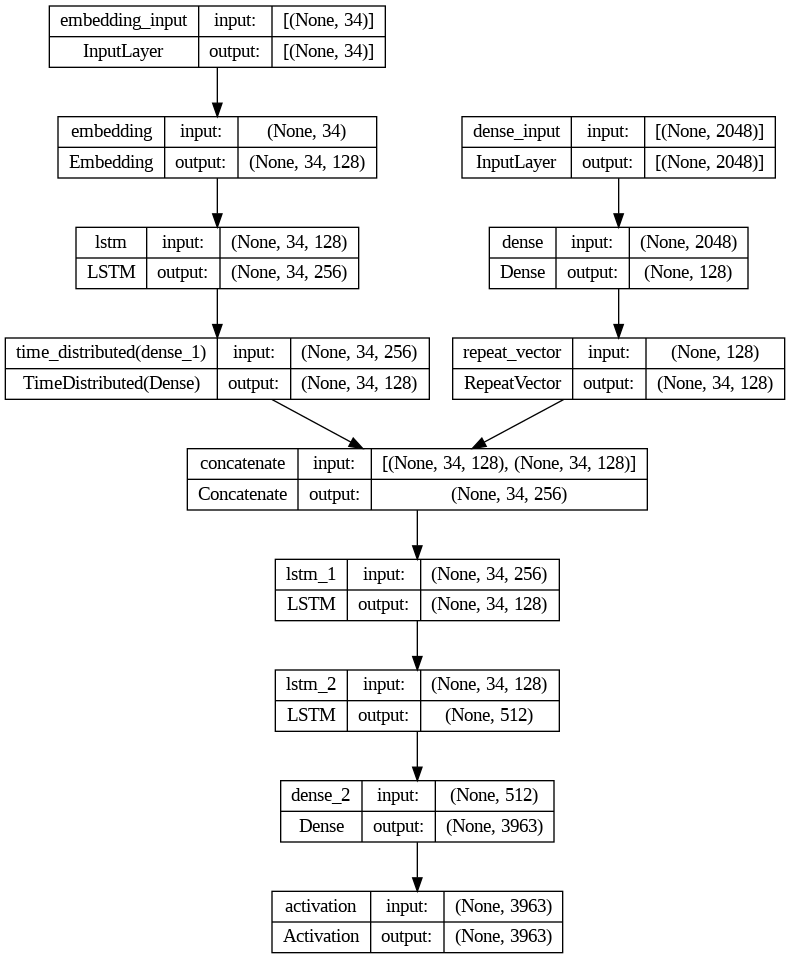

In [ ]:
tensorflow.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.fit([X,y_in],y_out, batch_size=512,epochs=5)

Epoch 1/5
189/189 [==============================] - 32s 129ms/step - loss: 5.3196 - accuracy: 0.1159
Epoch 2/5
189/189 [==============================] - 16s 85ms/step - loss: 5.1381 - accuracy: 0.1184
Epoch 3/5
189/189 [==============================] - 15s 81ms/step - loss: 5.0616 - accuracy: 0.1201
Epoch 4/5
189/189 [==============================] - 15s 81ms/step - loss: 4.9910 - accuracy: 0.1201
Epoch 5/5
189/189 [==============================] - 15s 78ms/step - loss: 4.9348 - accuracy: 0.1201


In [ ]:
inv_dict={v:k for k,v in new_dict.items()}

In [ ]:
def pred(im):
  test_img=cv2.imread(im[0])

  test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  lol=cv2.resize(test_img,(224,224))
  lol=np.reshape(lol,(1,224,224,3))

  test_feature=my_model.predict(lol).reshape(1,2048)

  text_input=["startofseq"]
  count=0
  caption=""
  while count<25:
    count+=1
    encoded=[]
    for i in text_input:
      encoded.append(new_dict[i])
    encoded=[encoded]
    encoded=pad_sequences(encoded, padding="post", truncating="post", maxlen=MAX_LEN)
    prediction=np.argmax(model.predict([test_feature, encoded]))
    sampled_word=inv_dict[prediction]
    caption=caption+" "+sampled_word
    if sampled_word=="endofseq":
      break
    text_input.append(sampled_word)

  return caption[:-9]

In [ ]:
img_name=glob("/content/drive/MyDrive/Photo /Porvi/919098821805_status_69159644a78b4d78a18304b5dc28fa93.jpg")

In [ ]:
pred(img_name)

1/1 [==============================] - 0s 52ms/step


' a a a a a a a a a a a a a a a a a a a a '